In [1]:
from autocnet_server.graph.graph import NetworkCandidateGraph

import glob

#ncg = NetworkCandidateGraph.from_filelist(glob.glob('/scratch/jlaura/ctx_demo/cal/*.cub'))
ncg = NetworkCandidateGraph.from_database()

/home/jlaura/anaconda3/envs/ct/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sub = ncg.subgraph(nodes=[80, 86, 90])
sub.apply('ring_match', on='edge', ring_radius=100, max_radius=1200, target_points=25, tolerance_val=0.1)

3

In [2]:
sub.apply('add_coordinates_to_matches', on='edge')

In [2]:
sub.apply('project_matches', on='edge', args=(3396190, 3376200,), srid=949900)

In [2]:
sub = ncg.subgraph(nodes=[80, 86, 90])
sub.apply('ring_match', on='edge', ring_radius=100, max_radius=1200, target_points=25, tolerance_val=0.1)

3

In [2]:
ncg.edges[(80,90)]['data'].matches

,id,source,source_idx,destination,destination_idx,lat,lon,geom,source_x,source_y,destination_x,destination_y,valid
0,28414,80,183795,90,117836,None,None,None,None,None,None,None,True
1,28415,80,146418,90,31154,None,None,None,None,None,None,None,True
2,28416,80,182343,90,141818,None,None,None,None,None,None,None,True
3,28417,80,196210,90,131284,None,None,None,None,None,None,None,True
4,28418,80,213206,90,149518,None,None,None,None,None,None,None,True
5,28419,80,271410,90,124130,None,None,None,None,None,None,None,True
6,28420,80,109605,90,10774,None,None,None,None,None,None,None,True
7,28421,80,248837,90,187582,None,None,None,None,None,None,None,True
8,28422,80,200530,90,154889,None,None,None,None,None,None,None,True
9,28423,80,81602,90,5122,None,None,None,None,None,None,None,True


In [2]:
ncg.edges[(80,90)]['data'].add_coordinates_to_matches()

       id  source  source_idx  destination  destination_idx   lat   lon  geom  \
0   28414      80      183795           90           117836  None  None  None   
1   28415      80      146418           90            31154  None  None  None   
2   28416      80      182343           90           141818  None  None  None   
3   28417      80      196210           90           131284  None  None  None   
4   28418      80      213206           90           149518  None  None  None   
5   28419      80      271410           90           124130  None  None  None   
6   28420      80      109605           90            10774  None  None  None   
7   28421      80      248837           90           187582  None  None  None   
8   28422      80      200530           90           154889  None  None  None   
9   28423      80       81602           90             5122  None  None  None   
10  28424      80      207244           90           118368  None  None  None   
11  28425      80      21635

ValueError: Length of values does not match length of index

Populating the interactive namespace from numpy and matplotlib


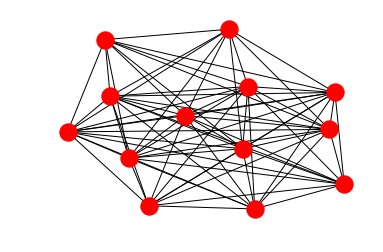

In [2]:
%pylab inline
ncg.plot()

In [3]:
extractor_params = {'compute_descriptor': True,
                    'float_descriptors': True,
                    'edge_thresh':2.5,
                    'peak_thresh': 0.0001,
                    'verbose': False}

ncg.apply('extract_features_with_tiling',
          on='node',
          extractor_method='vlfeat',
          extractor_parameters=extractor_params, 
          tilesize=5001)

13

In [2]:
for i, n in ncg.nodes(data='data'):
    print(n.nkeypoints)
    if n.nkeypoints < 200000:
        print(n.keypoints)

281649
275547
219474
235634
343987
287393
178723
                  x             y        size     angle            xm  \
0       3132.314453      2.350554    1.854443  3.466712 -3.076745e+06   
1       3600.207520      1.613599    2.030431  0.359307 -3.077733e+06   
2        264.785187      3.236057    2.121787  0.091931 -3.070725e+06   
3        264.785187      3.236057    2.121787  5.546999 -3.070725e+06   
4       3828.991943      2.784405    2.271488  0.168449 -3.078214e+06   
5       4097.959473      3.157985    2.193892  3.233910 -3.078779e+06   
6        229.928970      4.090526    1.789183  4.130303 -3.070652e+06   
7        229.928970      4.090526    1.789183  6.050991 -3.070652e+06   
8       2987.099854      4.390316    1.759109  3.513083 -3.076436e+06   
9       3491.323730      3.593335    2.010599  3.637729 -3.077502e+06   
10      3491.323730      3.593335    2.010599  5.818378 -3.077502e+06   
11      3497.545410      3.725355    1.976395  0.192132 -3.077514e+06   
12

In [3]:
ncg.apply('project_keypoints', on='node')

(82, 
        NodeID: 82
        Image Name: /scratch/jlaura/ctx_demo/cal/G20_026198_1888_XN_08N203W.cal.cub
        Image PATH: /scratch/jlaura/ctx_demo/cal/G20_026198_1888_XN_08N203W.cal.cub
        Number Keypoints: 248599
        Available Masks : Empty DataFrame
Columns: []
Index: []
        Type: <class 'autocnet_server.graph.graph.NetworkNode'>
        )
(90, 
        NodeID: 90
        Image Name: /scratch/jlaura/ctx_demo/cal/G03_019262_1888_XN_08N203W.cal.cub
        Image PATH: /scratch/jlaura/ctx_demo/cal/G03_019262_1888_XN_08N203W.cal.cub
        Number Keypoints: 246932
        Available Masks : Empty DataFrame
Columns: []
Index: []
        Type: <class 'autocnet_server.graph.graph.NetworkNode'>
        )
(80, 
        NodeID: 80
        Image Name: /scratch/jlaura/ctx_demo/cal/P02_001949_1883_XN_08N203W.cal.cub
        Image PATH: /scratch/jlaura/ctx_demo/cal/P02_001949_1883_XN_08N203W.cal.cub
        Number Keypoints: 275547
        Available Masks : Empty DataFrame
Colu

13

Populating the interactive namespace from numpy and matplotlib


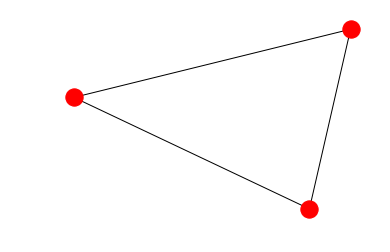

In [4]:
%pylab inline
sub = ncg.subgraph(nodes=[80, 86, 90])
sub.apply('ring_match', on='edge', ring_radius=100, max_radius=1200, target_points=25, tolerance_val=0.1)

TypeError: ring_match is not callable.